# Potencialna funkcija za playlisto

Youtube playlist ima množico videov.  Za vsak video imamo dolžino trajanja.  Zanima nas, kakšen je potencial še neogledanih videov.

Nariše graf potenciala in graf trajanja posameznih videov.

In [1]:
from datetime import datetime, time, timedelta
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
now = datetime.now()

df = pd.read_table('projekt.csv', sep=',', header=None)

df.columns = ('mins', 'secs')
nr, _ = df.shape
df.index = range(1, nr+1)

df['dur'] = [timedelta(minutes=mins, seconds=secs)
                     for i, (mins, secs) in df.iterrows()]

df.drop(['mins', 'secs'], axis='columns', inplace=True)

df.head()

,dur
1,0 days 00:10:35
2,0 days 00:09:34
3,0 days 00:13:43
4,0 days 00:11:58
5,0 days 00:09:09


In [3]:
now = datetime.now()

t0 = datetime(year=now.year, month=now.month, day=now.day)
t0_timedelta = timedelta(minutes=0, seconds=0)

df.at[0, 'dur'] = t0_timedelta
df.at[nr+1, 'dur'] = t0_timedelta

df.sort_index(inplace=True)

df.tail()

,dur
42,0 days 00:31:34
43,0 days 00:16:34
44,0 days 00:14:29
45,0 days 00:21:19
46,0 days 00:00:00


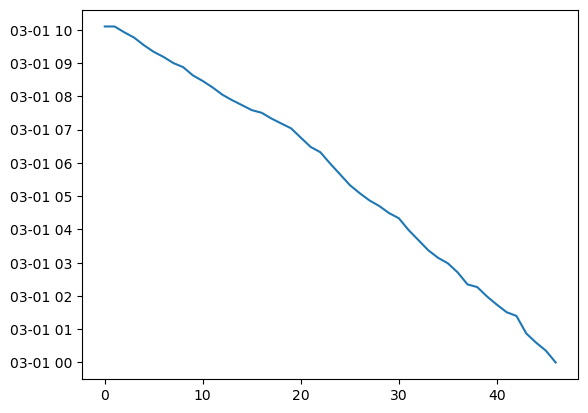

In [4]:
dur = list(df['dur'])

cd = t0
cumdur = [cd]

for d_timedelta in dur[-2::-1]:
    cd = cd + d_timedelta
    cumdur.append(cd)

cumdur.reverse()

plt.plot(cumdur)

In [5]:
df['cumdur'] = cumdur
df.head()

,dur,cumdur
0,0 days 00:00:00,2024-03-01 10:06:09
1,0 days 00:10:35,2024-03-01 10:06:09
2,0 days 00:09:34,2024-03-01 09:55:34
3,0 days 00:13:43,2024-03-01 09:46:00
4,0 days 00:11:58,2024-03-01 09:32:17


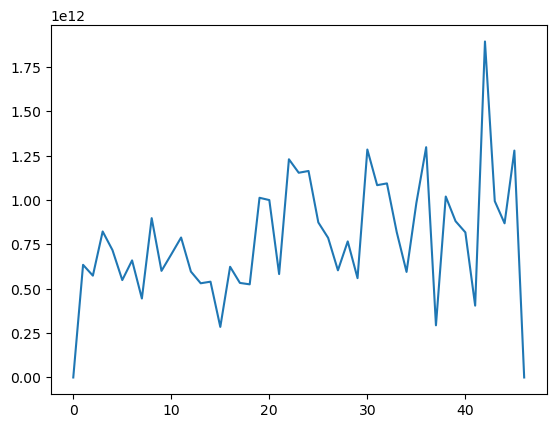

In [6]:
plt.plot(df['dur'])